In [3]:
import os
from dotenv import load_dotenv

load_dotenv("./.env")


False

In [4]:
from langchain_groq import ChatGroq
from langchain.prompts import PromptTemplate
from langchain.schema.runnable import RunnableMap,RunnableLambda, RunnablePassthrough,RunnableParallel
from langchain.output_parsers import PydanticOutputParser,OutputFixingParser
from langchain.pydantic_v1 import BaseModel, Field
from typing import List

In [5]:
llm = ChatGroq(
    temperature=0,
    model="llama3-70b-8192"
)


In [72]:
class PO( BaseModel):
    x_axis: List[str]= Field(description="coordinates of the X-axis of the graph")
    x_axis_name:str=Field(description="name of the x axis")
    y_axis: List[int]= Field(description="coordinates of the Y-axis of the graph")
    y_axis_name:str=Field(description="name of the y axis")
    graph_type: str= Field(description="the type of graph")
    explanation:str=Field(description="brief explanation of the graph")
    graph_name: str=Field(description="name of the graph")

In [73]:
parser=PydanticOutputParser(pydantic_object=PO)

fix_parser = OutputFixingParser.from_llm(parser=parser, llm=llm)

In [74]:
pt="""
You are an AI Graph Generator. You are an expert generating graph.
Given a question your main task is to generate the x-axis values,\
y-axis values, graph type and explanation of the graph.

Question:{{qns}}

Here are the details of the graph:
    graph-type: graph type could be line or bar based on the question.
    x-axis: x coordinates of the graph. 
    y-axis: y coordinates of the graph.
    description: brief explanation of the graph.

Note: The number of points in the x-axis should be equal to the number of points in the y-axis.
Note: Carefully read the question to figure out which type of graph to be used (line or bar).
Generate the graph in the format given below:
{{format_instructions}}
"""

In [75]:
prompt = PromptTemplate(template=pt,
                        input_variables=['qns'],
                        partial_variables={"format_instructions": fix_parser.get_format_instructions()},
                        template_format="jinja2"
                        )

In [76]:
chain = RunnableParallel({
    "qns":RunnablePassthrough()
}) | prompt | llm | fix_parser

In [13]:
out=chain.invoke("Give me a chart of India's population growth in the last 10 years").dict()

NameError: name 'chain' is not defined

In [52]:
out=chain.invoke("Give me a chart of the gdp of india over the last 5 years").dict()

In [77]:
out=chain.invoke("What are the infant mortality rates across the north eastern states of India in a 2018?").dict()

In [78]:
out

{'x_axis': ['Assam',
  'Arunachal Pradesh',
  'Meghalaya',
  'Manipur',
  'Mizoram',
  'Nagaland',
  'Tripura'],
 'x_axis_name': 'North Eastern States of India',
 'y_axis': [34, 29, 26, 24, 22, 20, 18],
 'y_axis_name': 'Infant Mortality Rate (per 1000 live births)',
 'graph_type': 'bar',
 'explanation': 'This graph shows the infant mortality rates across the north eastern states of India in 2018. The states are listed on the x-axis, and the corresponding infant mortality rates are shown on the y-axis. The graph reveals that Assam has the highest infant mortality rate, while Tripura has the lowest.',
 'graph_name': 'Infant Mortality Rates in North Eastern States of India (2018)'}

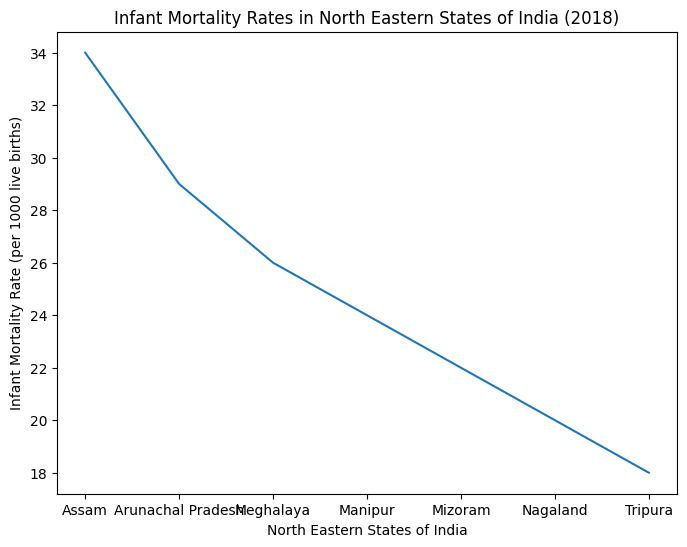

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=out["x_axis"], y=out["y_axis"])

# Set x-axis ticks to show the year values
plt.xticks(out["x_axis"])

# Add labels and title
plt.xlabel(out['x_axis_name'])
plt.ylabel(out['y_axis_name'])
plt.title(out['graph_name'])

# Show the plot
plt.show()

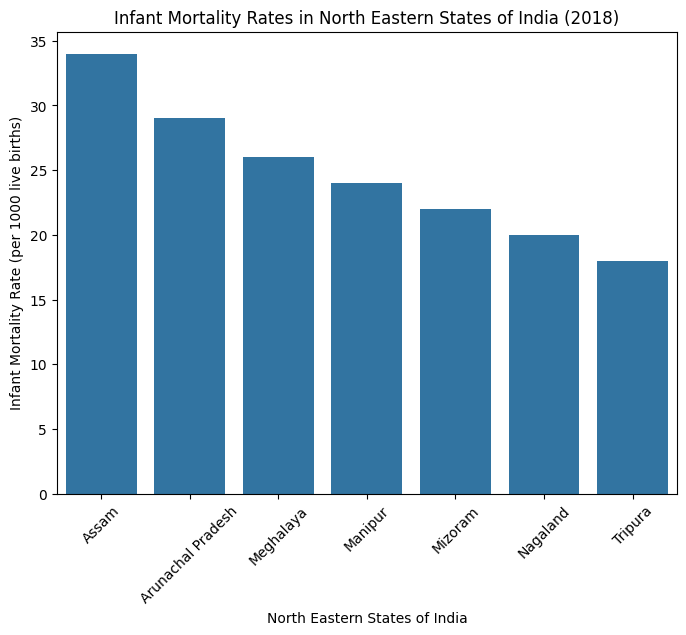

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(8, 6))
sns.barplot(x=out['x_axis'], y=out['y_axis'])

# Add labels and title
plt.xlabel(out['x_axis_name'])
plt.ylabel(out['y_axis_name'])
plt.title(out['graph_name'])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [9]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Construct the relative path to main.py
main_py_path = os.path.join(cwd, "..", "main.py")

# Add the directory containing main.py to the system path
sys.path.append(os.path.dirname(main_py_path))

# Import the main.py file
import main

In [10]:
from main import generate_graph

In [14]:
op=generate_graph("Give me a chart of India's population growth in the last 10 years")

In [16]:
op

{'x_axis': ['2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 'x_axis_name': 'Year',
 'y_axis': [1210, 1230, 1250, 1270, 1290, 1310, 1330, 1350, 1370, 1390],
 'y_axis_name': 'Population (in millions)',
 'graph_type': 'line',
 'explanation': 'This graph shows the population growth of India over the last 10 years, with a steady increase from 1210 million in 2013 to 1390 million in 2022.',
 'graph_name': "India's Population Growth (2013-2022)"}

In [17]:
data={op['x_axis_name']:op['x_axis'],op['y_axis_name']:op["y_axis"]}

In [19]:
import pandas as pd
df = pd.DataFrame(data)

In [20]:
import streamlit as st